In [1]:
# import required libraries
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
# Load your actual minute-level data into a DataFrame
data = pd.read_csv('data/gold_minutely_data.csv', index_col='Date', parse_dates=True)

In [3]:
# Resample to 6-hour intervals (or adjust for 3, 4 hours as needed)
resampled_data = data.resample('6h').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

In [4]:
# slice the last 16 bars
update_data = resampled_data.tail(16)
update_data.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-26 06:00:00,2660.50,2675.56,2657.82,2672.60,41636
2024-09-26 12:00:00,2672.56,2685.49,2654.71,2668.14,85007
2024-09-26 18:00:00,2668.13,2677.76,2667.50,2672.19,28150
2024-09-27 00:00:00,2672.26,2673.87,2666.15,2670.38,27817
2024-09-27 06:00:00,2670.33,2671.21,2658.31,2664.27,49697


In [6]:
# Define support and resistance levels dynamically
support_level = update_data['Low'].min()  # or use a custom value
resistance_level = update_data['High'].max()  # or use a custom value
print(support_level)
print(resistance_level)

2642.92
2685.49


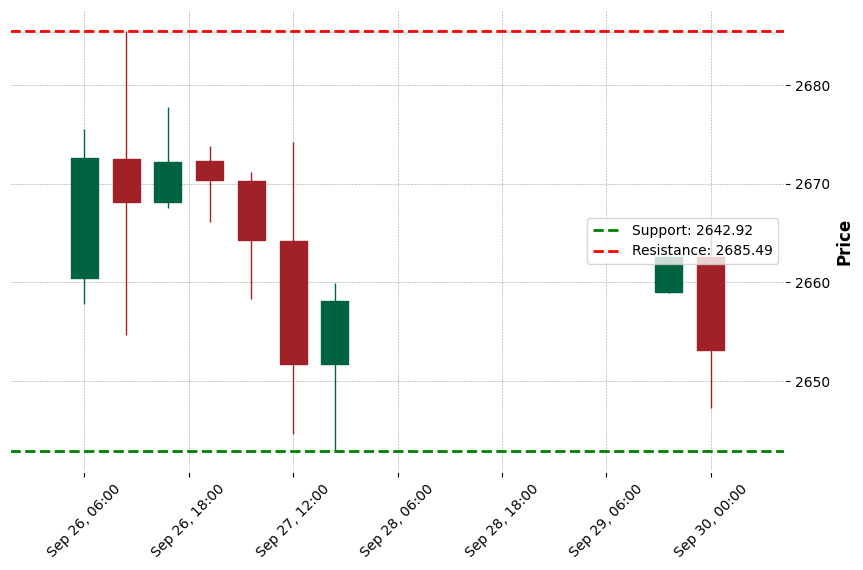

In [17]:
# Create the candlestick chart and return the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Use mplfinance to plot the candlestick chart on the existing axis (ax)
mpf.plot(
    update_data, 
    type='candle', 
    ax=ax, 
    style='charles', 
    ylabel='Price',
    volume=False
)

# Now, plot the support and resistance lines directly using matplotlib
ax.axhline(y=support_level, color='green', linestyle='--', label=f'Support: {support_level}')
ax.axhline(y=resistance_level, color='red', linestyle='--', label=f'Resistance: {resistance_level}')

# Add legend and show the plot
ax.legend(loc="center right")
plt.show()